In [1]:
import numpy as np
import pandas as pd

import gzip
import pickle

import twint

# Fixes runtime errors with twint
import nest_asyncio
nest_asyncio.apply()

import matplotlib
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import string
import emoji

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

%load_ext autoreload

%autoreload

# from functions import *

# Loading csvs

In [2]:
df = pd.read_csv('5k_Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [233]:
jan = pd.read_csv('Datasets/5k_jan_tweets.csv', index_col=0)
feb = pd.read_csv('Datasets/5k_feb_tweets.csv', index_col=0)
mar = pd.read_csv('Datasets/5k_mar_tweets.csv', index_col=0)
apr = pd.read_csv('Datasets/5k_apr_tweets.csv', index_col=0)
may = pd.read_csv('Datasets/5k_may_tweets.csv', index_col=0)
months = [jan, feb, mar, apr, may]

In [234]:
df = pd.concat(months)
df.shape

(575949, 17)

### Obtaining target variable

In [235]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [236]:
conditions = [
    df.sentiment_score > .05,
    df.sentiment_score < -.05
]

choices = [
    'positive',
    'negative'
]

df['sentiment'] = np.select(conditions, choices, 'neutral')

In [334]:
print(df.shape)

(575949, 20)


In [257]:
df.reset_index(drop=True, inplace=True)

In [295]:
df.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to,sentiment_score,sentiment
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username': 'Best_of_MLTSHP'}]",-0.8176,negative
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut th...,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username': 'lumora_lu'}]",-0.8905,negative
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #H...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430526826479616,NaN,"[{'user_id': '963032516759207936', 'username': 'odiecher'}]",0.6705,positive
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysmoker'}, {'user_id': '1107018506300780544', 'username': 'cutedeadguys3'}]",-0.7783,negative
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8s'}, {'user_id': '14745988', 'username': 'ThunderB'}, {'user_id': '14138785', 'username': 'Telegraph...",-0.2960,negative


In [8]:
df.to_csv('Datasets/5k_jan_thru_may_tweets.csv')

# Big Load!!!!!

In [3]:
df = pd.read_csv('Datasets/5k_jan_thru_may_tweets.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 19)

In [4]:
df['date'] = df.date.astype('datetime64[ns]')

In [5]:
df.shape

(575949, 19)

# EDA/Feature Engineering

In [6]:
df[df.nlikes > 10].groupby('sentiment')['tweet'].count()

sentiment
negative    18052
neutral      8223
positive    21355
Name: tweet, dtype: int64

In [7]:
df[df.nlikes > 0].groupby('sentiment')['tweet'].count()

sentiment
negative    105452
neutral      49210
positive    121327
Name: tweet, dtype: int64

In [8]:
df.groupby('sentiment')['tweet'].count()

sentiment
negative    221363
neutral     115386
positive    239200
Name: tweet, dtype: int64

In [9]:
df.date[0]

Timestamp('2020-01-01 00:00:00')

In [10]:
df['month'] = df.date.apply(lambda x: x.month)
df['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [11]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [12]:
df.sentiment_score.describe()

count    575949.000000
mean          0.017756
std           0.505938
min          -0.998400
25%          -0.381800
50%           0.000000
75%           0.440400
max           0.999600
Name: sentiment_score, dtype: float64

In [13]:
df.groupby('month').sentiment.value_counts(normalize=True)

month  sentiment
1      positive     0.412361
       negative     0.409046
       neutral      0.178592
2      negative     0.421300
       positive     0.401849
       neutral      0.176851
3      positive     0.430622
       negative     0.387278
       neutral      0.182100
4      positive     0.405667
       negative     0.346007
       neutral      0.248327
5      positive     0.417187
       negative     0.393458
       neutral      0.189355
Name: sentiment, dtype: float64

In [14]:
df.groupby('date').sentiment.value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


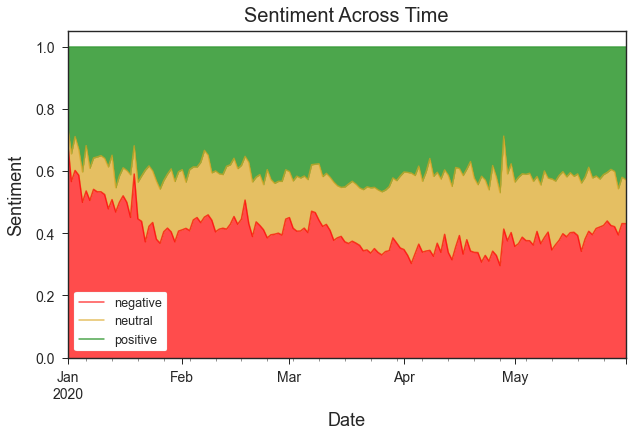

In [15]:
sns.set_style('ticks')

# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts(normalize=True).unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

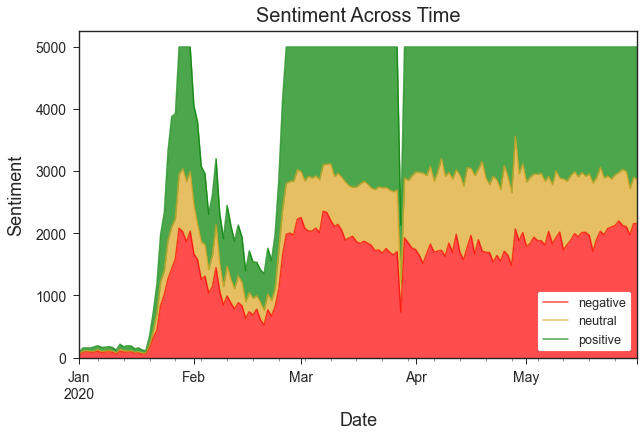

In [16]:
# sort by percentage of trees in good health
days = df.groupby('date').sentiment.value_counts().unstack()

# plot a stacked bar graph
p1 = days.plot.area(stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['negative','neutral', 'positive'], facecolor='white', framealpha=1)
plt.show()

# Cleaning text

In [17]:
stop_words = stopwords.words('english')
stop_words += ['mask', '#mask',
               'masks', '#masks',
               'face', '#face',
               'facemask', '#facemask',
               'facemasks', '#facemasks', 
               'covid', '#covid',
               'covid19', '#covid19',
               'corona', '#corona',
               'coronavirus', '#coronavirus',
               'rona', '#rona',
               'virus', '#virus',
               'viral', '#viral',
               'viruses', '#viruses']

# stop words from eda
eda_stop_words = ['wear', 'wearing', 'get', 'one', 'people', 'us', 'like', 'n95',
                   'go', 'going', 'would', 'surgical', 'via', 'also', 'use', 'even', 'know']

stop_words += eda_stop_words

In [18]:
%time df['clean_tweet'] = df['tweet'].apply(lambda x: clean_text(x, stop_words))
clean_tweets = df['clean_tweet']
clean_tweets.head()

CPU times: user 6min 28s, sys: 666 ms, total: 6min 28s
Wall time: 6min 29s


0                                                                                                                  death thomas unknown peasant died river
1                                                    ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck
2    joke #ccpchina come epidemic outbreakthink stayed silent #sars dear worldstay away #hk im sure infected amongst already dear fellow #hkers facewit...
3                                                                                                                            thought death gave horn freak
4                                                              interesting cult death thinkingface electronically posing cia brennan chief facewithmonocle
Name: clean_tweet, dtype: object

In [70]:
# clean_tweets.to_pickle('Datasets/clean_tweets.pkl')

In [18]:
# clean_tweets = pd.read_pickle('Datasets/clean_tweets.pkl')

In [3]:
# clean_tweets.to_pickle('Datasets/clean_tweets_v2.pkl')

In [6]:
# Load clean tweets from pickle
clean_tweets = pd.read_pickle('Datasets/clean_tweets_v2.pkl')

In [7]:
df['clean_tweets'] = clean_tweets
df.shape

(575949, 32)

In [8]:
pattern = "(#?[a-zA-Z]+[0-9]*(?:'[a-zx]+)?)"

In [9]:
# create a document-term matrix using CountVectorizer, using custom regex tokenizing pattern
from sklearn.feature_extraction.text import CountVectorizer

# Keep only words that appear at least 25 times
cv = CountVectorizer(min_df=250, token_pattern=pattern)
%time data_cv = cv.fit_transform(clean_tweets)
data_vec = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
print(data_vec.shape)
data_vec.head()

CPU times: user 8.73 s, sys: 172 ms, total: 8.91 s
Wall time: 8.92 s
(575949, 3712)


,#airlines,#amazon,#america,#americanairlines,#art,#besafe,#breaking,#breakingnews,#business,#california,...,yorkers,young,youre,youth,youtube,yr,zanyface,zero,zombie,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Let's save it for later use
# data_vec.to_csv("Datasets/sparse_matrix_clean.csv")

In [ ]:
# data_vec = pd.read_csv("Datasets/sparse_matrix_clean.csv", index_col=0)

In [7]:
# big_string = ' '.join(clean_tweets)
# big_string[:100]

In [32]:
# def corpus_from_series(corpusfolder, s):
#     for i, r in enumerate(s):
#         fname = f'tweet_{i}.txt'
#         corpusfile = open(corpusfolder+fname, 'a')
#         corpusfile.write(r)
#         corpusfile.close()

# corpus_from_series('corpus/', clean_tweets)

In [33]:
# corpus_path = 'corpus/'
# corpus = PlaintextCorpusReader(corpus_path, '.*')
# len(corpus.words())

8983989

In [27]:
%time words = big_string.split()

CPU times: user 522 ms, sys: 162 ms, total: 684 ms
Wall time: 684 ms


In [30]:
from collections import Counter
Counter(words).most_common(25)

[('hand', 40134),
 ('need', 39383),
 ('spread', 33418),
 ('protect', 32088),
 ('make', 31605),
 ('help', 30306),
 ('say', 28477),
 ('glove', 27649),
 ('public', 25717),
 ('hospital', 25525),
 ('new', 25340),
 ('time', 25085),
 ('medical', 24652),
 ('china', 24641),
 ('doctor', 24152),
 ('home', 23986),
 ('work', 23382),
 ('day', 22567),
 ('stop', 21958),
 ('trump', 21074),
 ('infected', 21008),
 ('please', 20635),
 ('everyone', 20359),
 ('health', 20312),
 ('death', 20287)]

In [31]:
total_vocab = set(words)
len(total_vocab)

243080

In [32]:
len(words)

7793391

In [33]:
from nltk.probability import FreqDist

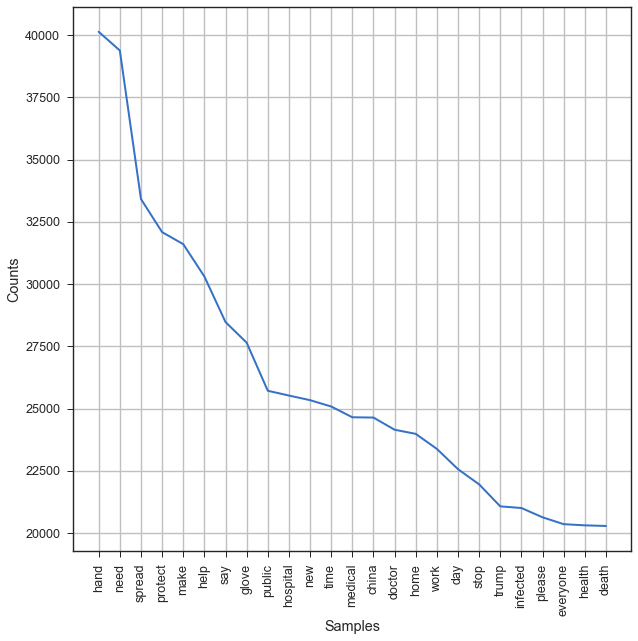

In [34]:
fdist = FreqDist(words)
plt.figure(figsize=(10,10))
fdist.plot(25)

# LDA

In [16]:
from gensim import matutils, models
import scipy.sparse

In [17]:
# One of the required inputs is a term-document matrix
tdm = data_vec.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,575939,575940,575941,575942,575943,575944,575945,575946,575947,575948
#a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#abc7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#abcnews,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#abhealth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
%time sparse_counts = scipy.sparse.csr_matrix(tdm)

In [ ]:
# corpus = matutils.Sparse2Corpus(sparse_counts)
# len(corpus)

In [51]:
# with gzip.open('Datasets/gensim_corpus2.pkl', 'rb') as handle:
#     corpus = pickle.load(handle)

In [52]:
type(corpus)

In [53]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [65]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
%time lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, passes=5)
lda.print_topics()

CPU times: user 14min 36s, sys: 9.48 s, total: 14min 46s
Wall time: 15min 3s


[(0,
  '0.041*"case" + 0.035*"worker" + 0.034*"business" + 0.029*"president" + 0.028*"death" + 0.028*"health" + 0.027*"cdc" + 0.026*"ppe" + 0.026*"million" + 0.025*"science"'),
 (1,
  '0.114*"pandemic" + 0.033*"contact" + 0.028*"kill" + 0.027*"protective" + 0.026*"close" + 0.020*"food" + 0.015*"surface" + 0.014*"personal" + 0.013*"learn" + 0.012*"total"'),
 (2,
  '0.065*"news" + 0.052*"test" + 0.038*"fear" + 0.035*"wave" + 0.030*"rollingonthefloorlaughing" + 0.024*"sense" + 0.023*"say" + 0.020*"fake" + 0.019*"thousand" + 0.019*"amid"'),
 (3,
  '0.100*"social" + 0.074*"new" + 0.042*"state" + 0.036*"case" + 0.028*"since" + 0.025*"week" + 0.022*"day" + 0.022*"month" + 0.020*"community" + 0.016*"vaccine"'),
 (4,
  '0.040*"protection" + 0.038*"number" + 0.027*"air" + 0.025*"infected" + 0.024*"infection" + 0.024*"droplet" + 0.023*"effective" + 0.022*"eye" + 0.021*"particle" + 0.017*"worn"'),
 (5,
  '0.068*"protest" + 0.036*"transmission" + 0.034*"risk" + 0.033*"protesting" + 0.024*"high" + 0

In [ ]:
corpus_transformed = lda[corpus]
df['lda_scores'] = corpus_transformed
df['lda_scores'].head()

In [61]:
def lda_getter(x):
    x_dict = dict(x)
    return int(max(x_dict, key=x_dict.get))

In [62]:
df['lda'] = df['lda_scores'].apply(lambda x: lda_getter(x))
df['lda'].head()

0    6
1    5
2    1
3    8
4    8
Name: lda, dtype: int64

In [63]:
# df.to_csv('5k_Datasets/5k_tweets_lda_10')

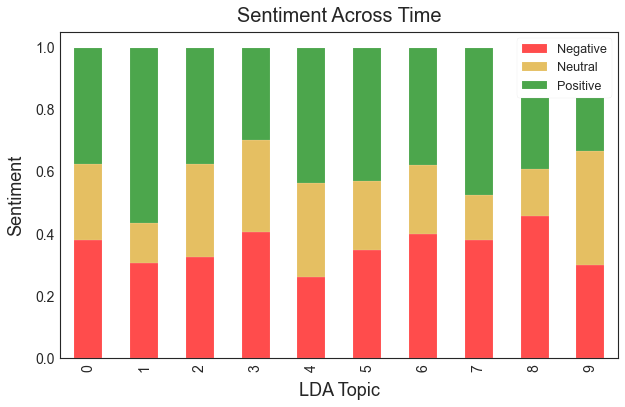

In [64]:
# sort by percentage of trees in good health
sent_by_lda = df.groupby('lda').sentiment.value_counts(normalize=True).unstack()
# plot a stacked bar graph
p1 = sent_by_lda.plot(kind='bar', stacked = True, figsize=(10,6),
#                    title = 'Tree Health Across Boroughs', 
                   color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)
p1.set_title('Sentiment Across Time', fontsize=20, pad=10)
p1.set_xlabel('LDA Topic', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1)
# plt.show()

# Subjectivity Score

In [8]:
df.shape

(575949, 23)

In [9]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment', 'lda_scores', 'lda', 'subjectivity_score', 'clean_tweets'],
      dtype='object')

In [10]:
df['subjectivity_score'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.subjectivity_score.head()

0    0.600000
1    0.560000
2    0.462963
3    0.000000
4    0.500000
Name: subjectivity_score, dtype: float64

In [11]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment', 'lda_scores', 'lda', 'subjectivity_score', 'clean_tweets'],
      dtype='object')

In [72]:
# df.to_csv('5k_Datasets/5k_tweets_lda_10.csv')

# LDA Dummies

In [21]:
lda_dummies = pd.get_dummies(df['lda'], prefix='lda', drop_first=True)

In [22]:
df = pd.concat([df, lda_dummies], axis=1)
df.shape

(575949, 32)

In [24]:
# df.to_csv('5k_Datasets/5k_tweets_lda_10.csv')

# Preprocessing

In [10]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment', 'lda_scores', 'lda', 'subjectivity_score', 'clean_tweets',
       'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9'],
      dtype='object')

In [11]:
features_cols = ['nlikes', 'nreplies', 'nretweets', 'subjectivity_score',
                'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8', 'lda_9']

In [12]:
%time features_df = pd.concat([df[features_cols], data_vec], axis=1)
del data_vec
features_df.shape

CPU times: user 56 s, sys: 14.4 s, total: 1min 10s
Wall time: 1min 13s


(575949, 3725)

In [13]:
features_df.head()

,nlikes,nreplies,nretweets,subjectivity_score,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,...,yorkers,young,youre,youth,youtube,yr,zanyface,zero,zombie,zone
0,1.0,0.0,1.0,0.600000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.560000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.462963,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
with gzip.open('Datasets/features_df.pkl', 'wb') as handle:
    pickle.dump(features_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Train Test Split

In [2]:
df = pd.read_csv('5k_Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [3]:
with gzip.open('Datasets/features_df.pkl', 'rb') as handle:
    features_df = pickle.load(handle)  
features_df.shape

(575949, 3725)

In [ ]:
from sklearn.model_selection import train_test_split

In [2]:
with open('Datasets/features_df.pkl', 'rb') as handle:
    features_df = pickle.load(handle)

UnpicklingError: invalid load key, '\x1f'.

In [43]:
# Fucntion to split data into train and test data
def tt_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
    return X_train, X_test, y_train, y_test

# Split training data into train and test data
X_train, X_test, y_train, y_test = tt_split(features_df, df['sentiment'])

X_train.shape, X_test.shape

((431961, 3725), (143988, 3725))

# MinMax Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train_mm_scl = mm_scaler.fit_transform(X_train)
X_test_mm_scl = mm_scaler.transform(X_test)

# Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_std_scl = std_scaler.fit_transform(X_train)
X_test_std_scl = sstd_caler.transform(X_test)

# Bernoulli Naive Bayes

In [32]:
from sklearn.naive_bayes import BernoulliNB

In [33]:
# Function to fit bernoulli naive bayes model
def bnb(X_train, y_train):
    bnb = BernoulliNB()
    bnb_fit = bnb.fit(X_train, y_train)
    return bnb_fit

In [ ]:
# Fit bernoulli naive bayes model on train data, predict on minmax scaler test data
bnb_fit_mm_scl = bnb(X_train_mm_scl, y_train)
bnb_preds_mm_scl = bnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(bnb_preds_mm_scl, y_test), f1_score(bnb_preds_mm_scl, y_test, average='weighted')

In [39]:
# Fit bernoulli naive bayes model on train data, predict on standard scaler test data
bnb_fit_std_scl = bnb(X_train_std_scl, y_train)
bnb_preds_std_scl = bnb_fit_std_scl.predict(X_test_std_scl)

accuracy_score(bnb_preds_std_scl, y_test), f1_score(bnb_preds_std_scl, y_test, average='weighted')

# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Function to fit multinomial naive bayes model
def mnb(X_train, y_train):
    mnb = MultinomialNB()
    mnb_fit = mnb.fit(X_train, y_train)
    return mnb_fit

In [ ]:
# Fit multinomial naive bayes model on train data, predict on minmax scaler test data
mnb_fit_mm_scl = mnb(X_train_mm_scl, y_train)
mnb_preds_mm_scl = mnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(mnb_preds_mm_scl, y_test), f1_score(mnb_preds_mm_scl, y_test, average='weighted')

In [ ]:
# Fit multinomial naive bayes model on train data, predict on standard scaler test data
mnb_fit_std_scl = mnb(X_train_std_scl, y_train)
mnb_preds_std_scl = mnb_fit_std_scl.predict(X_test_std_scl)

accuracy_score(mnb_preds_std_scl, y_test), f1_score(mnb_preds_std_scl, y_test, average='weighted')